# Họ và Tên: Lê Gia Huy
# MSSV: 207ct27908

## Câu 1 (2 điểm) Chọn một ảnh bất kỳ (tự đặt tên, ví dụ `pic1.jpg`) và thực hiện:

- Làm mờ ảnh bằng box filter. (0.5 điểm)  
- Áp dụng Laplacian để phát hiện biên. (0.5 điểm)  
- Chuyển đổi ảnh sang ảnh âm bản (negative). (0.5 điểm)  
- Chuyển sang không gian màu HSV và lưu 3 kênh H, S, V riêng biệt.  lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm) (0.5 điểm)


In [2]:
import cv2
import numpy as np

# Đọc ảnh gốc
image = cv2.imread('Bai1/pic1.jpg')
if image is None:
    raise FileNotFoundError("Không tìm thấy ảnh 'pic1.jpg'")
# Làm mờ ảnh bằng bộ lọc trung bình (box filter)
blurred = cv2.blur(image, (5, 5))  # kernel 5x5
cv2.imwrite('Bai1/pic1_blur.jpg', blurred)
# Chuyển sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng Laplacian
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)  # Chuyển về dạng uint8
cv2.imwrite('Bai1/pic1_laplacian.jpg', laplacian)
# Ảnh âm bản = 255 - ảnh gốc
negative = 255 - image
cv2.imwrite('Bai1/pic1_negative.jpg', negative)
# Chuyển sang không gian màu HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# Lưu 3 kênh H, S, V thành ảnh grayscale tương ứng
cv2.imwrite('Bai1/pic1_H.jpg', h)
cv2.imwrite('Bai1/pic1_S.jpg', s)
cv2.imwrite('Bai1/pic1_V.jpg', v)

True

### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật chuyển đổi không gian màu và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Chuyển sang ảnh xám (Grayscale) (0.5 điểm)  
* Chuyển sang HSV (0.5 điểm)  
* Chuyển sang LAB (0.5 điểm)  
* Cân bằng histogram (0.5 điểm)  
* Adaptive Thresholding (tham số ngẫu nhiên) (0.5 điểm)  
* CLAHE (Contrast Limited Adaptive Histogram Equalization) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* G: Grayscale  
* H: HSV  
* L: LAB  
* Q: Histogram Equalization  
* A: Adaptive Threshold  
* C: CLAHE (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_gray_flower.jpg`, `result_clahe_img1.jpg` (0.5 điểm)


Dropdown(description='Chọn xử lý:', layout=Layout(width='50%'), options=('G - Grayscale', 'H - HSV', 'L - LAB'…

Button(button_style='success', description='Xử lý và lưu kết quả', style=ButtonStyle())

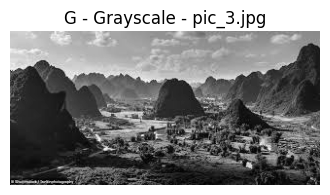

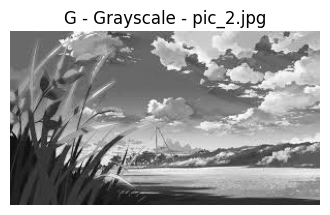

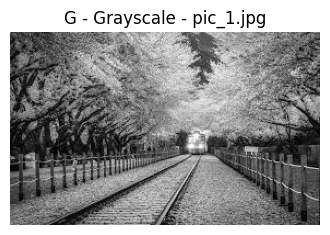

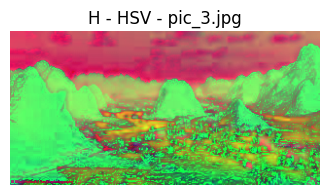

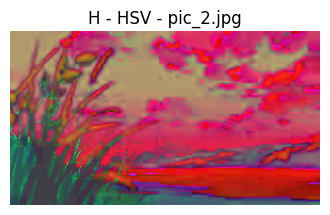

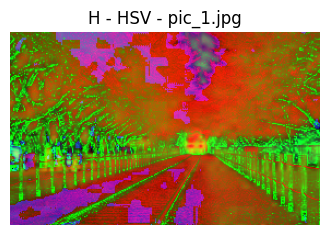

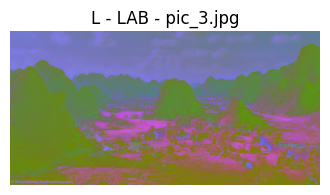

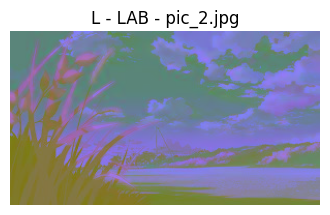

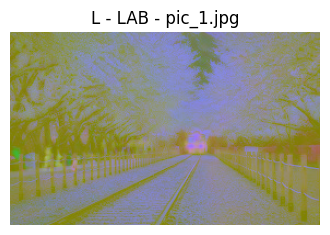

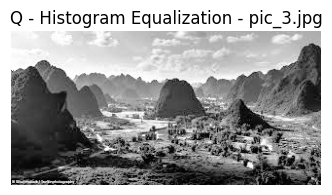

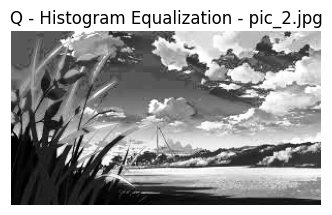

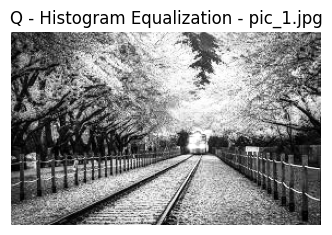

In [5]:
import cv2
import numpy as np
import os
import random
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# === CẤU HÌNH === #
folder_path = "Bai2"
os.makedirs(folder_path, exist_ok=True)

# === B1: LẤY DANH SÁCH FILE ẢNH === #
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_files = image_files[:3]

if len(image_files) < 3:
    raise ValueError("⚠️ Cần ít nhất 3 ảnh trong thư mục 'Bai2'.")

# === B2: ĐỌC ẢNH === #
images = [cv2.imread(os.path.join(folder_path, f)) for f in image_files]

# === B3: ĐỊNH NGHĨA PHƯƠNG PHÁP XỬ LÝ === #
def process_gray(img): return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def process_hsv(img): return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
def process_lab(img): return cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
def process_hist_equal(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray)
def process_adaptive_threshold(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    block_size = random.choice([11, 15, 21])
    C = random.randint(2, 10)
    print(f"⚙️ Adaptive Threshold dùng blockSize={block_size}, C={C}")
    return cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, block_size, C)
def process_clahe(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_Lab2BGR)

# === B4: MENU CHỌN === #
methods = {
    'G - Grayscale': ("gray", process_gray),
    'H - HSV': ("hsv", process_hsv),
    'L - LAB': ("lab", process_lab),
    'Q - Histogram Equalization': ("hist", process_hist_equal),
    'A - Adaptive Threshold': ("adaptive", process_adaptive_threshold),
    'C - CLAHE': ("clahe", process_clahe),
}

dropdown = widgets.Dropdown(
    options=list(methods.keys()),
    description='Chọn xử lý:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

button = widgets.Button(description="Xử lý và lưu kết quả", button_style='success')

# === B5: HÀM XỬ LÝ KHI BẤM NÚT === #
def on_button_clicked(b):
    method_label = dropdown.value
    method_code, method_func = methods[method_label]

    for img, filename in zip(images, image_files):
        result = method_func(img)
        save_path = os.path.join(folder_path, f"result_{method_code}_{filename}")
        cv2.imwrite(save_path, result)
        print(f"✅ Đã lưu: {save_path}")

        # Hiển thị kết quả
        plt.figure(figsize=(4, 4))
        if len(result.shape) == 2:
            plt.imshow(result, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title(f"{method_label} - {filename}")
        plt.axis('off')
        plt.show()

# Gán hàm xử lý sự kiện
button.on_click(on_button_clicked)

# === B6: HIỂN THỊ GIAO DIỆN === #
display(dropdown)
display(button)


### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Cắt ảnh đầu tiên theo tỉ lệ 80% ở giữa. (0.5 điểm)  
* Xoay ảnh thứ hai 90 độ và lật dọc. (0.5 điểm)  
* Thu nhỏ ảnh thứ ba xuống 1/3 kích thước ban đầu và áp dụng Median Blur với kernel 7x7. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba theo công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.7, 1.8], \quad \beta \in [-40, 40]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


In [1]:
import cv2
import numpy as np
import os
import random

# Thư mục chứa ảnh gốc và lưu kết quả
folder_path = "Bai3"

# Lấy 3 ảnh đầu tiên trong thư mục
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_files = image_files[:3]

if len(image_files) < 3:
    raise ValueError("Cần ít nhất 3 ảnh trong thư mục ./Bai3")

# Đọc 3 ảnh từ đường dẫn đầy đủ
img1 = cv2.imread(os.path.join(folder_path, image_files[0]))
img2 = cv2.imread(os.path.join(folder_path, image_files[1]))
img3 = cv2.imread(os.path.join(folder_path, image_files[2]))

### --- Ảnh 1: Cắt 80% phần giữa ảnh --- ###
h1, w1 = img1.shape[:2]
start_x = int(0.1 * w1)
start_y = int(0.1 * h1)
end_x = int(0.9 * w1)
end_y = int(0.9 * h1)
cropped = img1[start_y:end_y, start_x:end_x]
cv2.imwrite(os.path.join(folder_path, "result_crop_pic_1.jpg"), cropped)
print("✓ Đã lưu ảnh 1 sau khi cắt")

### --- Ảnh 2: Xoay 90 độ và lật dọc --- ###
rotated = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
flipped = cv2.flip(rotated, 0)  # 0 = lật dọc
cv2.imwrite(os.path.join(folder_path, "result_rotate_flip_pic_2.jpg"), flipped)
print("✓ Đã lưu ảnh 2 sau khi xoay và lật")

### --- Ảnh 3: Thu nhỏ, Median blur và điều chỉnh sáng/contrast --- ###
h3, w3 = img3.shape[:2]
resized = cv2.resize(img3, (w3 // 3, h3 // 3), interpolation=cv2.INTER_AREA)

# Làm mờ
blurred = cv2.medianBlur(resized, 7)

# Điều chỉnh sáng và tương phản
alpha = random.uniform(0.7, 1.8)
beta = random.randint(-40, 40)
adjusted = cv2.convertScaleAbs(blurred, alpha=alpha, beta=beta)

# Lưu kết quả
cv2.imwrite(os.path.join(folder_path, "result_blur_adjust_img3.jpg"), adjusted)
print(f"✓ Đã lưu ảnh 3 sau khi thu nhỏ, làm mờ, chỉnh sáng/contrast (alpha={alpha:.2f}, beta={beta})")


✓ Đã lưu ảnh 1 sau khi cắt
✓ Đã lưu ảnh 2 sau khi xoay và lật
✓ Đã lưu ảnh 3 sau khi thu nhỏ, làm mờ, chỉnh sáng/contrast (alpha=0.72, beta=26)


# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.